In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
#Problems with accuracy
from sklearn.metrics import accuracy_score

In [2]:
# Missing value treatment[Unused]
def deal_missing_value(df):
    # check on missing value
    print(pd.isna(df).sum())
    
    #drop the rows with missing value x8 
    #categorical data only
    df.dropna(axis=0, inplace=True)
    
    return df

# detecting the outliers using boxplot
def deal_outliers(df, col):
    Q1, Q3 = np.percentile(df[col] , [25, 75])
    IQR = Q3 - Q1
    ul = Q3 + 1.5 * IQR
    ll = Q1 - 1.5 * IQR

    outliers = df[(df[col] > ul) | (df[col] < ll)]
    print(len(outliers))
    
    df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))
    
    return df

# plot boxplot
def plot_boxplot(df, col, desc):
    sns.boxplot(x = col, data = df).set(title = 'Boxplot of ' + col + " " + desc)
    plt.show()
    
def obtain_unique_value(df, col):
    return dict(enumerate(df[col].unique()))

def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
        
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

In [3]:
# Read csv data file
df = pd.read_csv('dataset.csv')

In [4]:
# write code to show first 5 items of DataFrame df
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
1,39,blue-collar,married,middle,yes,no,nov,NaN,124,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,False
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1,False
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0,False


In [5]:
# write code to show a quick description all attributes in housing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40000 non-null  int64  
 1   x2      40000 non-null  object 
 2   x3      40000 non-null  object 
 3   x4      40000 non-null  object 
 4   x5      40000 non-null  object 
 5   x6      40000 non-null  object 
 6   x7      40000 non-null  object 
 7   x8      39994 non-null  object 
 8   x9      40000 non-null  int64  
 9   x10     40000 non-null  int64  
 10  x11     40000 non-null  int64  
 11  x12     40000 non-null  int64  
 12  x13     40000 non-null  float64
 13  x14     39992 non-null  float64
 14  x15     40000 non-null  float64
 15  x16     40000 non-null  float64
 16  x17     40000 non-null  float64
 17  y       40000 non-null  bool   
dtypes: bool(1), float64(5), int64(5), object(7)
memory usage: 5.2+ MB


In [6]:
#show the statistics of all numerical attributes in df
df.describe()

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39992.000000,40000.000000,40000.000000,40000.000000
mean,40.012200,258.721825,2.566375,962.110625,0.173075,0.081885,93.576081,-40.501567,3.621611,5167.021655
std,10.416123,260.258055,2.771441,187.806197,0.495758,1.570986,0.578954,4.627286,1.734336,72.249786
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


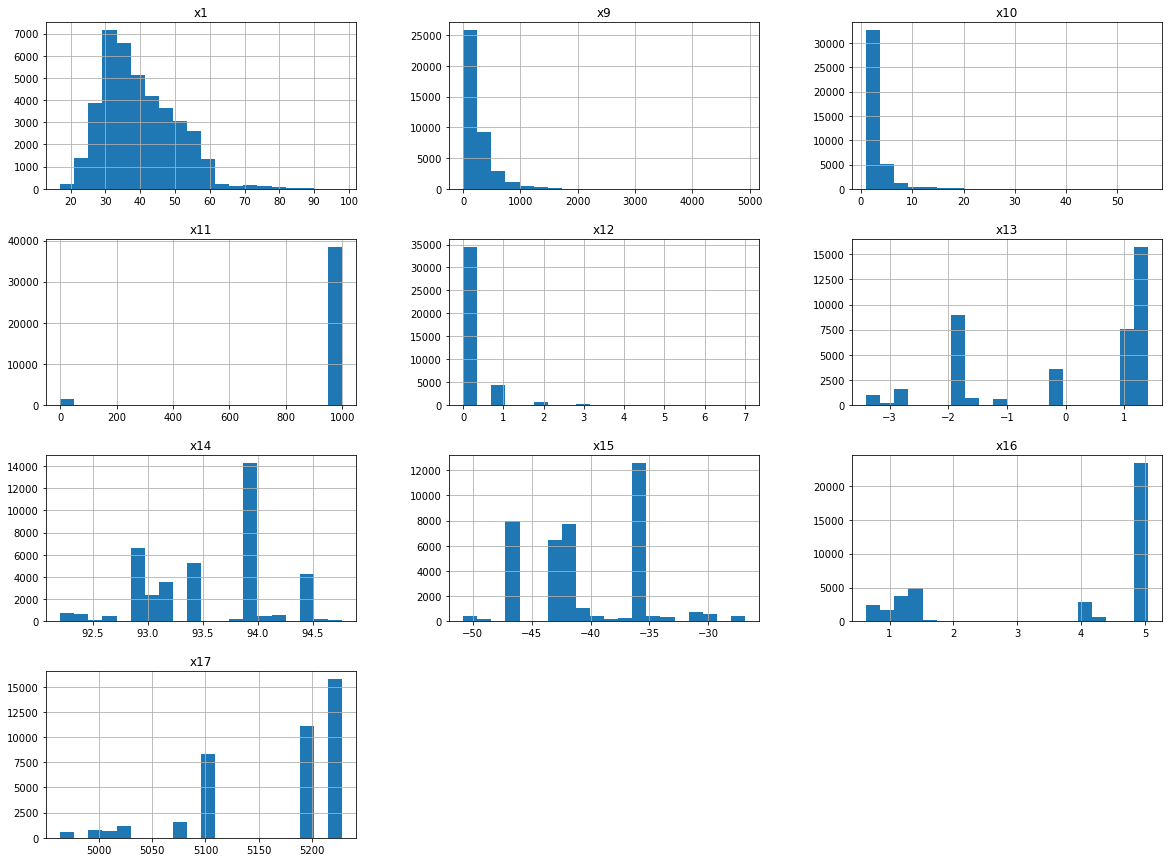

In [7]:
# plot the histogram of each numerical attribute
#20 bins= total 50 bars
df.hist(bins=20,figsize=(20,15))
plt.show()

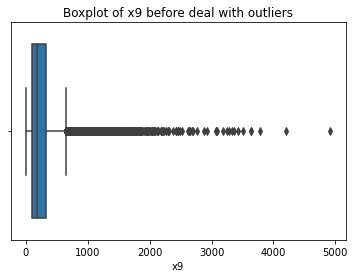

2862


C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


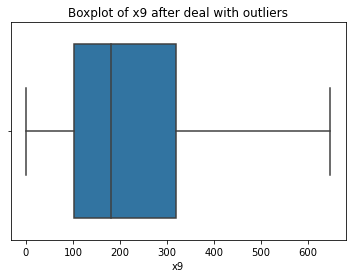

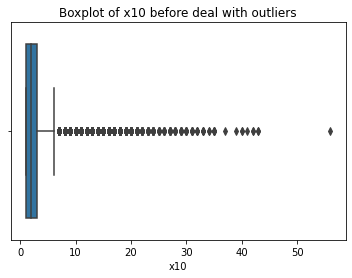

2332


C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


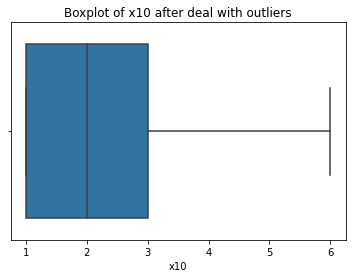

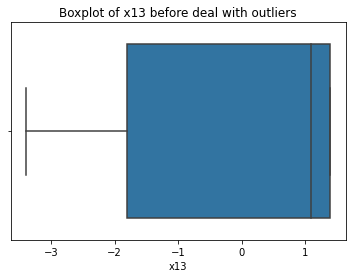

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


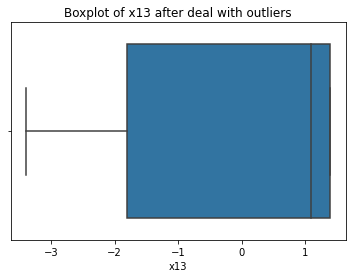

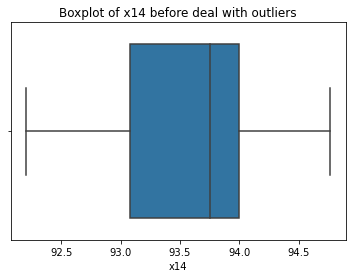

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


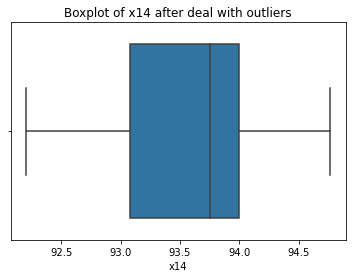

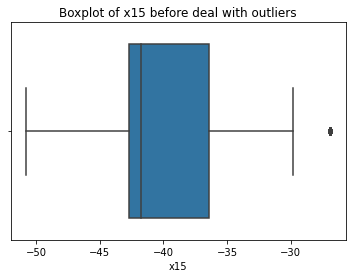

433


C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


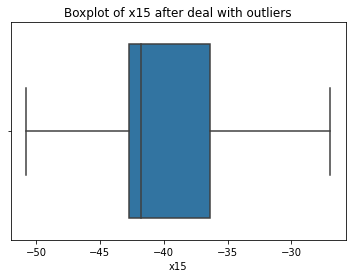

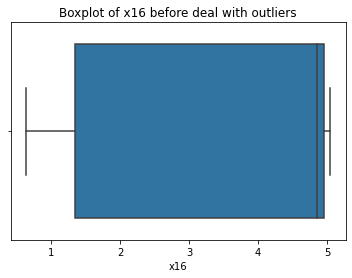

0


C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


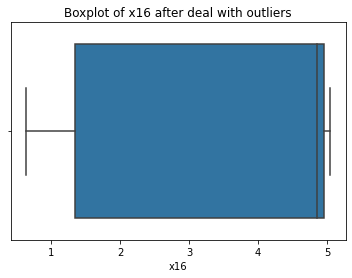

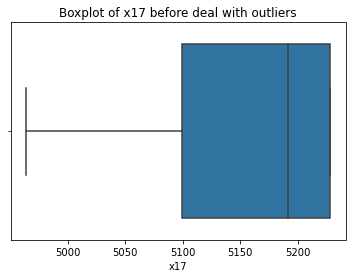

C:\Users\shinj\AppData\Local\Temp\ipykernel_29096\3635445007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = np.where(df.loc[:, col] > ul, ul, np.where(df.loc[:, col] < ll, ll, df.loc[:, col]))


0


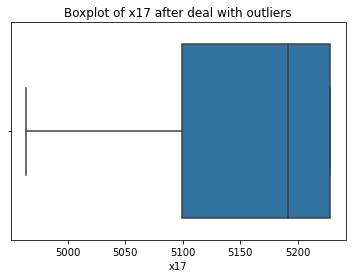

In [8]:
#plot boxplot to check outliers and whether the data is skewed or not
#check for outliers
#delete outliers
temp_df = df[['x9', 'x10', 'x13', 'x14','x15', 'x16', 'x17']]

# loop all the numeric features
for feature in temp_df:
    plot_boxplot(temp_df, feature, "before deal with outliers")
    temp_df = deal_outliers(temp_df, feature)
    plot_boxplot(temp_df, feature, "after deal with outliers")

In [9]:
# write code to show the correlation matrix
corr_matrix=df.corr()
corr_matrix

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
x1,1.000000,-0.000925,0.005496,-0.035615,0.024587,-0.000773,0.000380,0.128557,0.010629,-0.017344,0.031999
x9,-0.000925,1.000000,-0.072296,-0.047273,0.021044,-0.027163,0.005686,-0.008273,-0.032193,-0.043996,0.404339
x10,0.005496,-0.072296,1.000000,0.052989,-0.079899,0.150872,0.127956,-0.014130,0.135363,0.144438,-0.066920
x11,-0.035615,-0.047273,0.052989,1.000000,-0.589795,0.273055,0.080035,-0.092833,0.298944,0.374779,-0.327329
x12,0.024587,0.021044,-0.079899,-0.589795,1.000000,-0.420568,-0.202889,-0.048873,-0.454651,-0.501943,0.232859
x13,-0.000773,-0.027163,0.150872,0.273055,-0.420568,1.000000,0.775651,0.195617,0.972217,0.906907,-0.299165
x14,0.000380,0.005686,0.127956,0.080035,-0.202889,0.775651,1.000000,0.059424,0.688541,0.522326,-0.136666
x15,0.128557,-0.008273,-0.014130,-0.092833,-0.048873,0.195617,0.059424,1.000000,0.277303,0.099884,0.054047
x16,0.010629,-0.032193,0.135363,0.298944,-0.454651,0.972217,0.688541,0.277303,1.000000,0.945121,-0.309039
x17,-0.017344,-0.043996,0.144438,0.374779,-0.501943,0.906907,0.522326,0.099884,0.945121,1.000000,-0.355790


<AxesSubplot:>

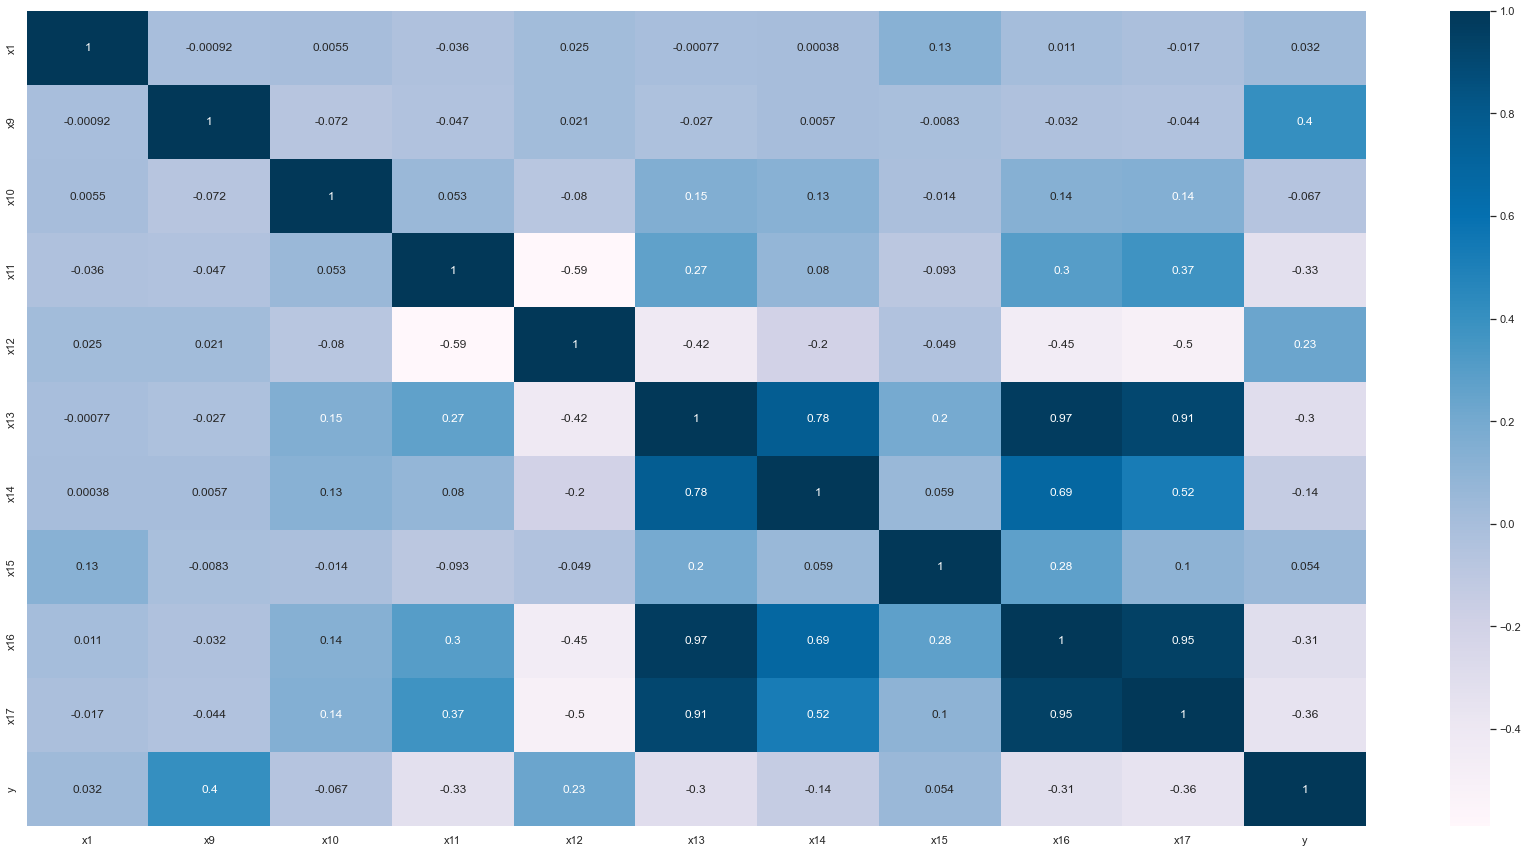

In [10]:
#annot=True: annotbool or rectangular dataset. If True, write the data value in each cell
corr = df.corr()
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(corr, cmap="PuBu", annot=True)

In [11]:
#numeric data comparision only
corr_matrix['y'].sort_values(ascending=False)

y      1.000000
x9     0.404339
x12    0.232859
x15    0.054047
x1     0.031999
x10   -0.066920
x14   -0.136666
x13   -0.299165
x16   -0.309039
x11   -0.327329
x17   -0.355790
Name: y, dtype: float64

In [12]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     6
x9     0
x10    0
x11    0
x12    0
x13    0
x14    8
x15    0
x16    0
x17    0
y      0
dtype: int64

In [13]:
df=df.dropna(axis=0, subset=['x8'])

In [14]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    8
x15    0
x16    0
x17    0
y      0
dtype: int64

In [15]:
# Making a list of missing value types
missing_values = ["unknown"]
df = pd.read_csv("dataset.csv", na_values = missing_values)

In [16]:
df.isnull().sum()

x1        0
x2      319
x3       78
x4     1684
x5      962
x6      962
x7        0
x8        6
x9        0
x10       0
x11       0
x12       0
x13       0
x14       8
x15       0
x16       0
x17       0
y         0
dtype: int64

In [17]:
df=df.dropna(axis=0, subset=['x8', 'x2', 'x3', 'x4', 'x5', 'x6'])

In [18]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    6
x15    0
x16    0
x17    0
y      0
dtype: int64

In [19]:
# write code to separate the output (y) from input (X)
#y refer to classes
x=df.drop('y', axis=1)
y=df['y']
x

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0
5,48,services,divorced,primary,yes,no,jun,phone,122,1,999,0,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,26,unemployed,married,high,yes,no,jul,cell,474,7,999,0,-1.7,94.215,-40.3,0.822,4991.6
39996,59,unemployed,married,professional,yes,no,aug,cell,378,2,999,1,-2.9,92.201,-31.4,0.881,5076.2
39997,23,self-employed,single,middle,yes,no,may,cell,64,2,999,0,-1.8,92.893,-46.2,1.266,5099.1
39998,33,technician,married,high,no,no,apr,cell,211,2,999,1,-1.8,93.075,-47.1,1.405,5099.1


In [20]:
#check the shape and numbers of rows
print("Shape of x is ", x.shape)
print("Shape of y is ", y.shape)

Shape of x is  (37134, 17)
Shape of y is  (37134,)


In [21]:
df['x2'].value_counts()

admin            9651
blue-collar      8318
technician       6212
services         3599
management       2647
retired          1524
self-employed    1316
entrepreneur     1315
housemaid         954
unemployed        935
student           663
Name: x2, dtype: int64

In [22]:
df['x3'].value_counts()

married     22476
single      10482
divorced     4176
Name: x3, dtype: int64

In [23]:
df['x4'].value_counts()

university      11485
high             8989
primary          6034
middle           5672
professional     4937
illiterate         17
Name: x4, dtype: int64

In [24]:
df['x5'].value_counts()

yes    19981
no     17153
Name: x5, dtype: int64

In [25]:
df['x6'].value_counts()

no     31317
yes     5817
Name: x6, dtype: int64

In [26]:
df['x7'].value_counts()

may    12440
jul     6437
aug     5631
jun     4714
nov     3792
apr     2356
oct      638
sep      486
mar      484
dec      156
Name: x7, dtype: int64

In [27]:
df['x8'].value_counts()

cell     23703
phone    13431
Name: x8, dtype: int64

In [28]:
df['y'].value_counts()

False    32992
True      4142
Name: y, dtype: int64

In [29]:
# show the correlation matrix
corr_matrix = df.corr()
corr_matrix

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
x1,1.000000,0.002118,0.006668,-0.039664,0.028314,-0.003814,-0.001857,0.127092,0.007752,-0.020332,0.032105
x9,0.002118,1.000000,-0.071691,-0.044029,0.017019,-0.024707,0.007444,-0.008409,-0.028759,-0.040479,0.404326
x10,0.006668,-0.071691,1.000000,0.052014,-0.079431,0.150807,0.128884,-0.011131,0.134927,0.143375,-0.065730
x11,-0.039664,-0.044029,0.052014,1.000000,-0.583248,0.270678,0.082255,-0.092330,0.293765,0.368686,-0.321680
x12,0.028314,0.017019,-0.079431,-0.583248,1.000000,-0.419470,-0.208335,-0.055006,-0.450529,-0.494990,0.223623
x13,-0.003814,-0.024707,0.150807,0.270678,-0.419470,1.000000,0.775889,0.210939,0.972394,0.907921,-0.293299
x14,-0.001857,0.007444,0.128884,0.082255,-0.208335,0.775889,1.000000,0.070501,0.690091,0.524864,-0.133955
x15,0.127092,-0.008409,-0.011131,-0.092330,-0.055006,0.210939,0.070501,1.000000,0.291843,0.114650,0.050904
x16,0.007752,-0.028759,0.134927,0.293765,-0.450529,0.972394,0.690091,0.291843,1.000000,0.945326,-0.301823
x17,-0.020332,-0.040479,0.143375,0.368686,-0.494990,0.907921,0.524864,0.114650,0.945326,1.000000,-0.348867


<AxesSubplot:>

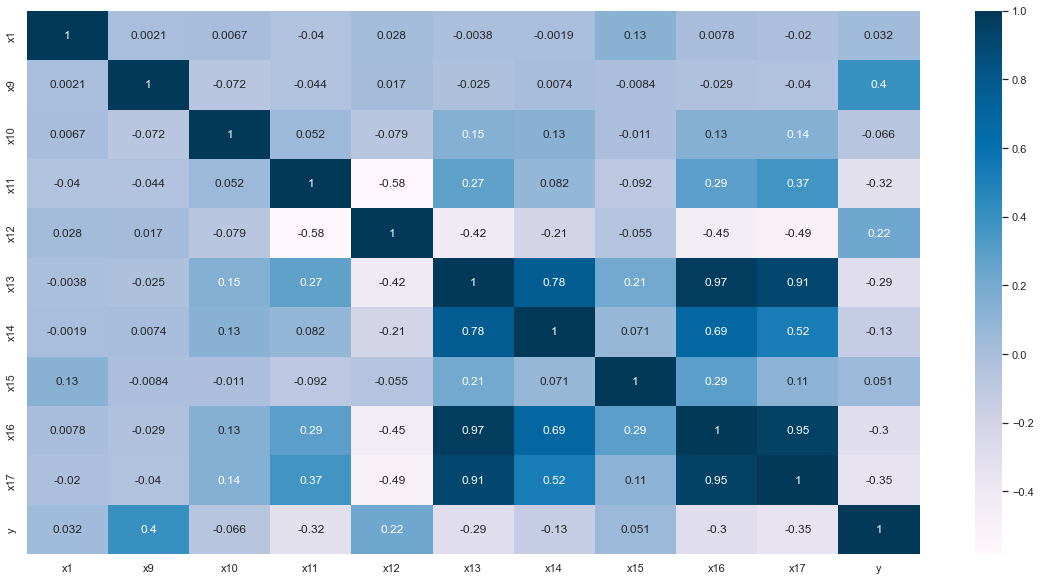

In [30]:
#annot=True: annotbool or rectangular dataset. If True, write the data value in each cell
corr = df.corr()
#set figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr, cmap="PuBu", annot=True)

In [31]:
corr_matrix['y'].sort_values(ascending = False)

y      1.000000
x9     0.404326
x12    0.223623
x15    0.050904
x1     0.032105
x10   -0.065730
x14   -0.133955
x13   -0.293299
x16   -0.301823
x11   -0.321680
x17   -0.348867
Name: y, dtype: float64

In [32]:
df.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    6
x15    0
x16    0
x17    0
y      0
dtype: int64

In [33]:
#split 20%test set and 80%training set
#random set is set to 30

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size=0.2, random_state=30)
x_test.shape
x_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
15316,34,management,married,university,yes,no,nov,cell,130,6,999,0,-0.1,93.200,-42.0,4.076,5195.8
26128,24,services,married,high,no,no,jul,phone,139,1,999,0,1.4,93.918,-42.7,4.963,5228.1
36928,50,admin,married,high,yes,no,nov,phone,182,2,999,0,-0.1,93.200,-42.0,4.021,5195.8
5654,57,blue-collar,married,middle,yes,no,jul,cell,101,3,999,0,1.4,93.918,-42.7,4.961,5228.1
16122,33,technician,single,university,no,no,aug,cell,134,6,999,0,1.4,93.444,-36.1,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28652,34,services,divorced,primary,no,no,nov,cell,254,1,999,0,-0.1,93.200,-42.0,4.120,5195.8
16521,39,admin,divorced,university,no,no,aug,cell,199,4,999,0,1.4,93.444,-36.1,4.963,5228.1
3759,22,unemployed,single,university,no,yes,oct,phone,34,2,999,0,-1.1,94.601,-49.5,0.977,4963.6
37173,32,technician,divorced,middle,no,no,apr,cell,105,1,999,0,-1.8,93.075,-47.1,1.405,5099.1


In [34]:
#check type after split
#the function will convert our df to other type
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [35]:
x_train.isnull().sum()
#total got 8 missing value in x14(Numerical Data)
#3 in test set 3 in training set

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    3
x15    0
x16    0
x17    0
dtype: int64

In [36]:
#split training set x to numerical and categorical
#split x2....... to categorical
#as from the df.info(0 we can know that which are categorical and which one are numerical)
x_train_num=x_train.drop(['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8'], axis=1)
x_train_cat=x_train[['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8']]
print("Shape of x train numerical is ", x_train_num.shape)
print("Shape of x train categorical is ", x_train_cat.shape)

Shape of x train numerical is  (29707, 10)
Shape of x train categorical is  (29707, 7)


In [37]:
#double check the whether there is missing value in categorical data
x_train_cat.isnull().sum()
#There are no missing data in x_train num

x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64

In [38]:
x_train_num.isnull().sum()

x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    3
x15    0
x16    0
x17    0
dtype: int64

In [39]:
#Use imputer to replace the missing vale
#use most frequent strategy(mode) as the the data distribtuion is normal(not skewed) ---> can find article
#then fit and transform
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'most_frequent')
imputer.fit(x_train_num)
x_train_num_tr=imputer.transform(x_train_num)

In [40]:
#check data type
#after the function of simpleImputer, type change from df to array
print(type(x_train_num))
print(type(x_train_num_tr))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [41]:
print('Number of missing values for all columns:')
#change array back to df
x_train_num_tr_pd = pd.DataFrame(x_train_num_tr, columns = x_train_num.columns)
x_train_num_tr_pd.isnull().sum() #no missing value in numerical after replacement of data

Number of missing values for all columns:


x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
dtype: int64

In [42]:
#use standard Scaler to [defination], to prevent....
#after the standard scaler function, value of mean and stdev will....
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train_num_tr_pd)
x_train_num_tr=scaler.transform(x_train_num_tr_pd)
x_train_num_tr

array([[ 1.2794346 , -0.43612392, -0.20603935, ..., -1.22483857,
        -1.35065397, -0.96037953],
       [-1.34899506, -0.12512218, -0.20603935, ..., -1.22483857,
        -1.38251706, -0.96037953],
       [ 0.0138944 , -0.30557998, -0.20603935, ..., -1.42019113,
        -1.2892451 , -0.96037953],
       ...,
       [-0.1808041 , -0.83543479,  0.87837764, ..., -0.4651342 ,
         0.77084858,  0.84443695],
       [-0.76489958, -0.85463243, -0.56751168, ..., -0.31319333,
         0.3027508 ,  0.39253329],
       [ 1.66883159, -0.58970502, -0.56751168, ..., -0.4651342 ,
         0.77084858,  0.84443695]])

In [43]:
#display the mean and stdev value
#mean value is close to zero and stdev is 1
#it shows that....

print('>>> Mean of all columns:\n', x_train_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', x_train_num_tr.std(axis=0))

>>> Mean of all columns:
 [-5.66865144e-17 -9.61518093e-17 -2.27224425e-17 -3.26963988e-16
  5.87195751e-17  1.00457114e-17 -1.67021911e-14  5.81933711e-16
  2.43967277e-16 -9.13920555e-16]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Dealing missing value of categorical data

In [44]:
print('Number of missing values for all categorical columns:')
x_train_cat.isnull().sum()

Number of missing values for all categorical columns:


x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64

In [45]:
x_train_cat_2 = x_train_cat['x2']
x_train_cat_3 = x_train_cat['x3']
x_train_cat_4 = x_train_cat['x4']
x_train_cat_5 = x_train_cat['x5']
x_train_cat_6 = x_train_cat['x6']
x_train_cat_7 = x_train_cat['x7']
x_train_cat_8 = x_train_cat['x8']

In [46]:
labelencoder = LabelEncoder()
x_train_cat_4 = labelencoder.fit_transform(x_train_cat_4)
x_train_cat_4.shape

(29707,)

In [47]:
lb_encoder_2 = LabelBinarizer()
x_train_cat_2 = lb_encoder_2.fit_transform(x_train_cat_2)
x_train_cat_2.shape

(29707, 11)

In [48]:
lb_encoder_3 = LabelBinarizer()
x_train_cat_3 = lb_encoder_3.fit_transform(x_train_cat_3)
x_train_cat_3.shape

(29707, 3)

In [49]:
lb_encoder_5 = LabelBinarizer()
x_train_cat_5 = lb_encoder_5.fit_transform(x_train_cat_5)
x_train_cat_5.shape

(29707, 1)

In [50]:
lb_encoder_6 = LabelBinarizer()
x_train_cat_6 = lb_encoder_6.fit_transform(x_train_cat_6)
x_train_cat_6.shape

(29707, 1)

In [51]:
lb_encoder_7 = LabelBinarizer()
x_train_cat_7 = lb_encoder_7.fit_transform(x_train_cat_7)
x_train_cat_7.shape

(29707, 10)

In [52]:
lb_encoder_8 = LabelBinarizer()
x_train_cat_8 = lb_encoder_8.fit_transform(x_train_cat_8)
x_train_cat_8.shape

(29707, 1)

In [53]:
x_train_cat_4 = pd.DataFrame(x_train_cat_4)
x_train_cat_4

,0
0,3
1,0
2,3
3,0
4,0
...,...
29702,5
29703,0
29704,3
29705,5


In [54]:
x_train_cat_tr = np.hstack([x_train_cat_2, x_train_cat_3, x_train_cat_4, x_train_cat_5, x_train_cat_6, x_train_cat_7, x_train_cat_8])
print('x_train_tr shape:', x_train_cat_tr.shape)

x_train_tr shape: (29707, 28)


In [55]:
x_train_tr = np.hstack([x_train_num_tr, x_train_cat_tr])

print('x_train_tr shape:', x_train_tr.shape)
print('y_train shape:', y_train.info)

x_train_tr shape: (29707, 38)
y_train shape: <bound method Series.info of 4393     False
37240    False
37036    False
93       False
28628    False
         ...  
16993    False
32844    False
988      False
35810    False
4874     False
Name: y, Length: 29707, dtype: bool>


In [56]:
y_train = y_train.values;  #convert to numpy array

In [57]:
from sklearn.linear_model import SGDClassifier

# Exercise: create a SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
sgd_clf=SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
# Train using the training set
sgd_clf.fit(x_train_tr, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=None)

In [58]:
#performing prediction
y_pred=sgd_clf.predict(x_train_tr)

In [59]:
def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])

In [60]:
peek_results(y_train, y_pred)

actual |  Predicted
------------------
False  | False
False  | False
False  | False
False  | False
True  | True
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
True  | False
False  | False
False  | False
False  | False
False  | False
False  | True
False  | False
False  | True
False  | False


In [61]:
#Training Accuracy
from sklearn.metrics import accuracy_score

# Exercise: compute accuracy using accuracy_score and show the result
acc=accuracy_score(y_train, y_pred)
print("Training accuracy: ", round(acc, 4))

Training accuracy:  0.845


In [62]:
#Measuring training accuracy using Cross-Validation
from sklearn.model_selection import cross_val_score

# Exercise: compute 3-fold cross-validation accuracy and show the result
k_scores = cross_val_score(sgd_clf, x_train_tr, y_train, cv=3, scoring='accuracy')
print(k_scores)

[0.89750581 0.79923248 0.90022218]


In [63]:
#Problems with accuracy
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(x_train_tr)  # make sure sgd_clf has been trained
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy using all zeros values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.8449860302285657
Accuracy using all zeros values: 0.8896556367186185


In [64]:
#Perform cross-validated prediction
from sklearn.model_selection import cross_val_predict

#perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, x_train_tr, y_train, cv=3)

In [65]:
#display some random result 
peek_results(y_train, y_pred_cv)

actual |  Predicted
------------------
False  | False
False  | False
True  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | True
False  | False
False  | False
False  | False
True  | False
False  | False
True  | False
False  | False
False  | False
False  | False
False  | False


In [66]:
#Compute confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_pred_cv)
cm

array([[24412,  2017],
       [ 1974,  1304]], dtype=int64)

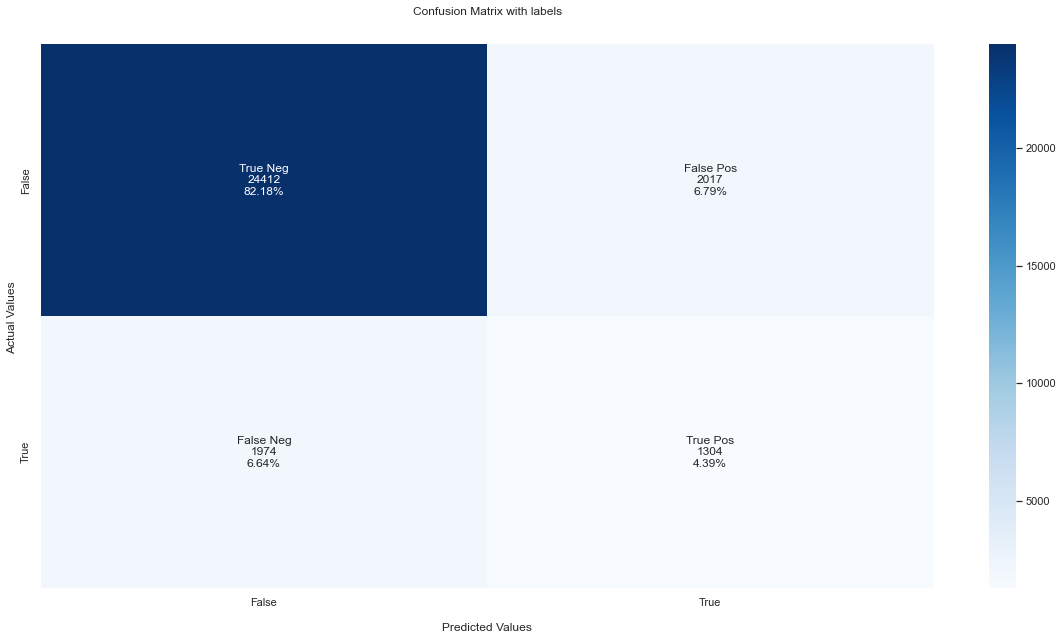

In [67]:
#Plotting the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
#Performance Measure: Precision, Recall and F1 Scorei
from sklearn.metrics import precision_score, recall_score, f1_score

precision=round(precision_score(y_train, y_pred_cv),4)
recall=round(recall_score(y_train, y_pred_cv),4)
f1_score=round(f1_score(y_train, y_pred_cv),4)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ", f1_score)

Precision:  0.3927
Recall:  0.3978
F1 score:  0.3952


In [69]:
#Generating prediction scores

y_scores = sgd_clf.decision_function(x_train_tr) # retrieve classification scores
peek_scores(y_train, y_scores)

actual |  score
------------------
False  | 0.7501976093636094
True  | 2.4190713051664012
False  | -1.770137051654931
False  | -3.596438000259395
False  | -4.091126008146041
False  | -1.3868441097561952
False  | -2.3967435738130565
False  | -3.2691616307562765
False  | -4.719080135583798
False  | -1.0673294419796582
False  | -2.085562603089409
False  | -5.65363835607883
False  | -3.8168528463947333
False  | -4.01379872539605
False  | -1.8245909085713166
False  | -3.171120600209612
True  | 1.8485731518415456
False  | -2.7026615011328
False  | 0.10377399036423185
False  | -1.7359550718127235


In [70]:
#retrieve the average cross-validated prediction score values for all samples 
y_scores_cv = cross_val_predict(sgd_clf, x_train_tr, y_train, cv=3, method="decision_function")
y_scores_cv

array([ -6.57491164,  -4.24401762,  -5.0718077 , ..., -11.49428225,
       -10.15465814, -10.40332429])

In [71]:
#Plot precision and recall graph
from sklearn.metrics import precision_recall_curve

#compute precision-recall pairs for different threshold values 
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_cv)

In [72]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
        
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

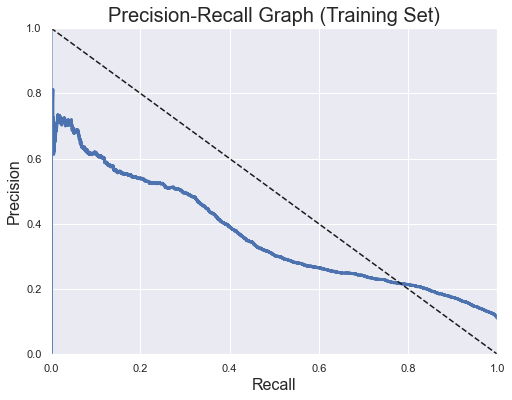

In [73]:
#Plot precision and recall graph
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

In [78]:
#Plot ROC graph
from sklearn.metrics import roc_curve

# Exercise: compute FPR-TPR pairs 
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

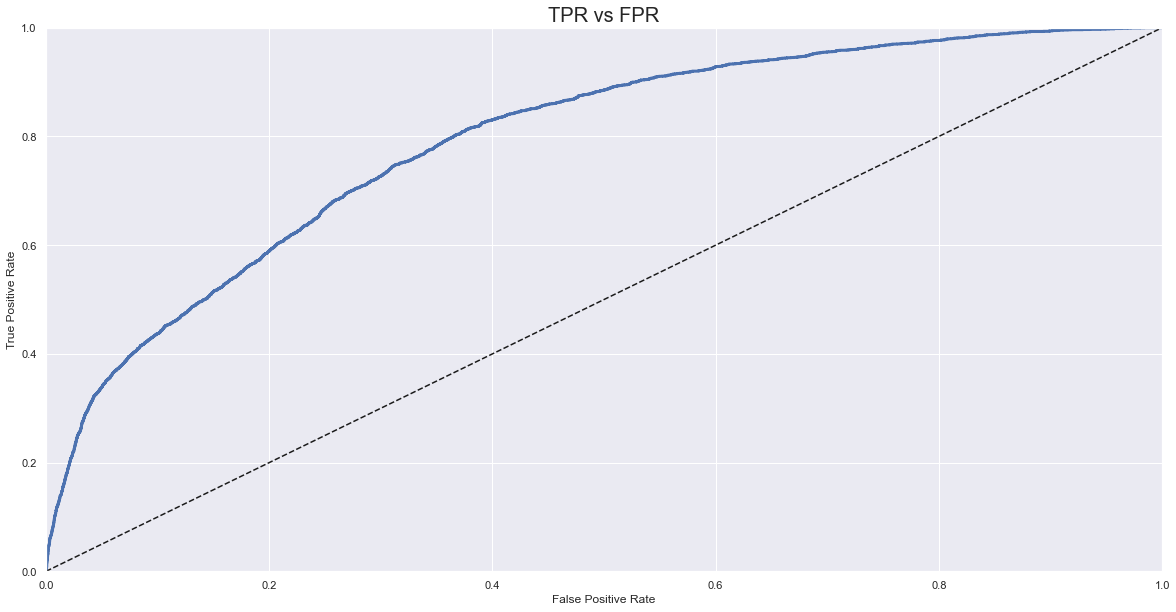

In [75]:
plot_roc_curve(fpr, tpr)

In [76]:
#The AUC (Area under curve) measure
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.7920


In [77]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, class_weight=class_weight, eta0=eta0)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter=1000) 
random_result = random.fit(x_train_tr, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9333482956102979
Best Params:  {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'invscaling', 'eta0': 1, 'class_weight': {1: 0.7, 0: 0.3}, 'alpha': 0.0001}


C:\Users\shinj\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
7